In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
inflows = pd.read_parquet("../data/ucsd-inflows.pqt")
outflows = pd.read_parquet("../data/ucsd-outflows.pqt")

In [8]:
from sklearn.model_selection import train_test_split

train_inflows, test_inflows = train_test_split(inflows, test_size=0.2, random_state=42)

train_outflows, test_outflows = train_test_split(outflows, test_size=0.2, random_state=42)

print(f"Train inflows shape: {train_inflows.shape}")
print(f"Test inflows shape: {test_inflows.shape}")
print(f"Train outflows shape: {train_outflows.shape}")
print(f"Test outflows shape: {test_outflows.shape}")

Train inflows shape: (410492, 6)
Test inflows shape: (102623, 6)
Train outflows shape: (2077990, 6)
Test outflows shape: (519498, 6)


In [9]:
train_inflows_stats = train_inflows['amount'].describe()
test_inflows_stats = test_inflows['amount'].describe()

print("Training set statistics for inflows:")
print(train_inflows_stats)

print("\nTest set statistics for inflows:")
print(test_inflows_stats)

train_outflows_stats = train_outflows['amount'].describe()
test_outflows_stats = test_outflows['amount'].describe()

print("\nTraining set statistics for outflows:")
print(train_outflows_stats)

print("\nTest set statistics for outflows:")
print(test_outflows_stats)

Training set statistics for inflows:
count    4.104920e+05
mean     7.379667e+02
std      5.473407e+03
min      1.000000e-02
25%      2.060000e+01
50%      1.000000e+02
75%      5.000000e+02
max      1.154966e+06
Name: amount, dtype: float64

Test set statistics for inflows:
count    102623.000000
mean        721.632281
std        4520.547069
min           0.010000
25%          20.465000
50%         100.000000
75%         500.000000
max      627825.530000
Name: amount, dtype: float64

Training set statistics for outflows:
count    2.077990e+06
mean     1.441452e+02
std      1.624905e+03
min      0.000000e+00
25%      9.630000e+00
50%      2.426000e+01
75%      6.641000e+01
max      6.548532e+05
Name: amount, dtype: float64

Test set statistics for outflows:
count    519498.000000
mean        149.051013
std        1962.808605
min           0.000000
25%           9.620000
50%          24.250000
75%          66.170000
max      627825.530000
Name: amount, dtype: float64


In [10]:
train_inflows_category_dist = train_inflows['category'].value_counts(normalize=True)
test_inflows_category_dist = test_inflows['category'].value_counts(normalize=True)

print("\nTraining set category distribution for inflows:")
print(train_inflows_category_dist)

print("\nTest set category distribution for inflows:")
print(test_inflows_category_dist)

train_outflows_category_dist = train_outflows['category'].value_counts(normalize=True)
test_outflows_category_dist = test_outflows['category'].value_counts(normalize=True)

print("\nTraining set category distribution for outflows:")
print(train_outflows_category_dist)

print("\nTest set category distribution for outflows:")
print(test_outflows_category_dist)


Training set category distribution for inflows:
category
EXTERNAL_TRANSFER        0.305173
SELF_TRANSFER            0.215269
DEPOSIT                  0.119323
MISCELLANEOUS            0.108536
PAYCHECK                 0.064669
PAYCHECK_PLACEHOLDER     0.050951
REFUND                   0.045433
INVESTMENT_INCOME        0.033701
SMALL_DOLLAR_ADVANCE     0.026378
OTHER_BENEFITS           0.014875
TAX                      0.006658
LOAN                     0.004897
UNEMPLOYMENT_BENEFITS    0.003793
INSURANCE                0.000346
Name: proportion, dtype: float64

Test set category distribution for inflows:
category
EXTERNAL_TRANSFER        0.304630
SELF_TRANSFER            0.215069
DEPOSIT                  0.120480
MISCELLANEOUS            0.108114
PAYCHECK                 0.064235
PAYCHECK_PLACEHOLDER     0.050398
REFUND                   0.044532
INVESTMENT_INCOME        0.034018
SMALL_DOLLAR_ADVANCE     0.027216
OTHER_BENEFITS           0.015611
TAX                      0.006548
LOAN 

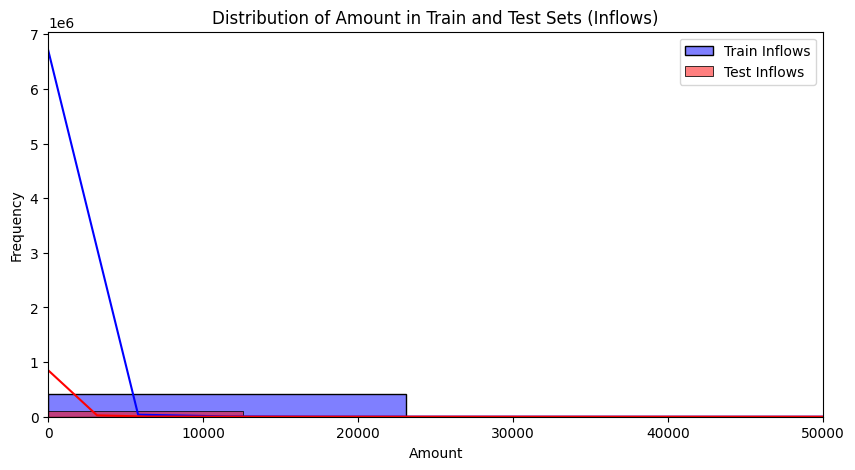

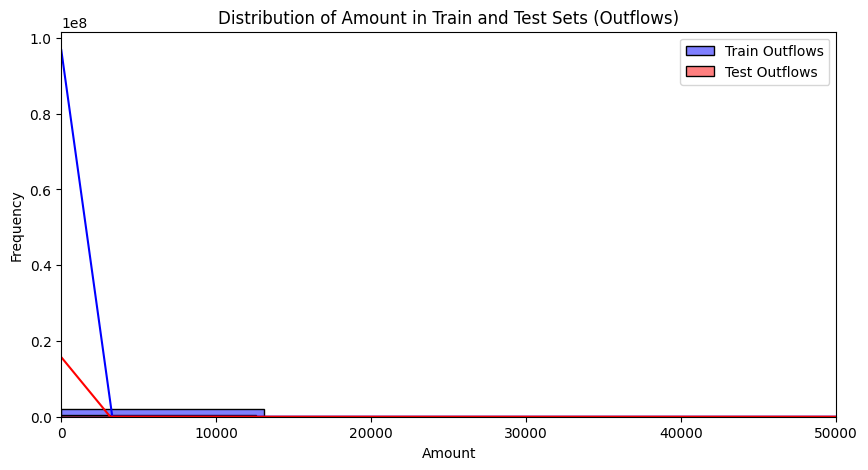

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(train_inflows['amount'], bins=50, color='blue', label='Train Inflows', kde=True)
sns.histplot(test_inflows['amount'], bins=50, color='red', label='Test Inflows', kde=True)
plt.title('Distribution of Amount in Train and Test Sets (Inflows)')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.xlim(0, 50000) 
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(train_outflows['amount'], bins=50, color='blue', label='Train Outflows', kde=True)
sns.histplot(test_outflows['amount'], bins=50, color='red', label='Test Outflows', kde=True)
plt.title('Distribution of Amount in Train and Test Sets (Outflows)')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.xlim(0, 50000) 
plt.legend()
plt.show()